# Data Preprocessing & EDA on Insurance Dataset
### Preparing Data for Machine Learning

In this notebook, we will:
1. Load and inspect the raw `insurance.csv` file  
2. Clean missing or inconsistent values  
3. Explore and visualize data (EDA)  
4. Detect and treat outliers  
5. Encode categorical variables & scale numerical features  
6. Prepare a final dataset ready for ML algorithms


## First step
The First step is always very simple you just have to import the necessary libraries and load the dataset for use

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv("insurance.csv")


## Second step
The second step involves Inspecting the data and finding the problems with the data

In [75]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [76]:
df.shape

(1338, 7)

In [77]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [79]:
df.duplicated().sum()

np.int64(1)

## Third Step
The third step is always to Handel the missing values and removing the Duplicates to make the data usable.

In [80]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

## Step 4: Exploratory Data Analysis (EDA)
EDA is about understanding the data’s story before modelling.
### Learning Goals

Understand distribution of numerical features

Analyse categorical variables

Study relationships between variables

Detect potential outliers or unusual patterns

<Axes: xlabel='age', ylabel='Count'>

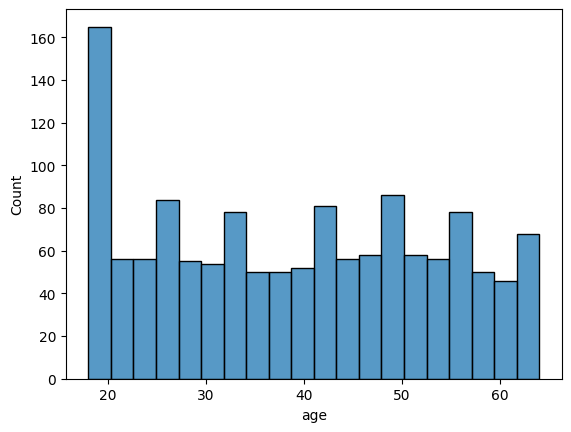

In [81]:
sns.histplot(df['age'], bins=20)

<Axes: xlabel='age', ylabel='Density'>

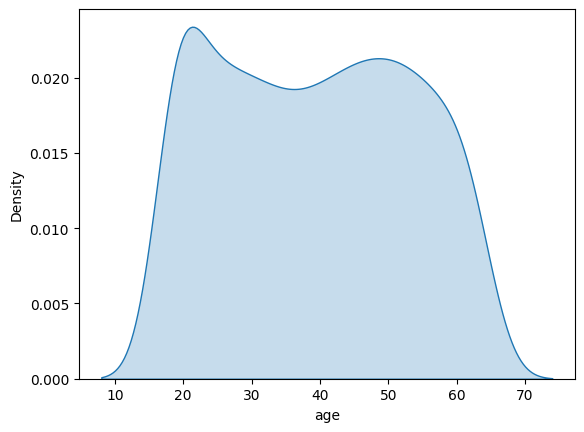

In [82]:
sns.kdeplot(df['age'],fill=True)

<Axes: xlabel='bmi', ylabel='Count'>

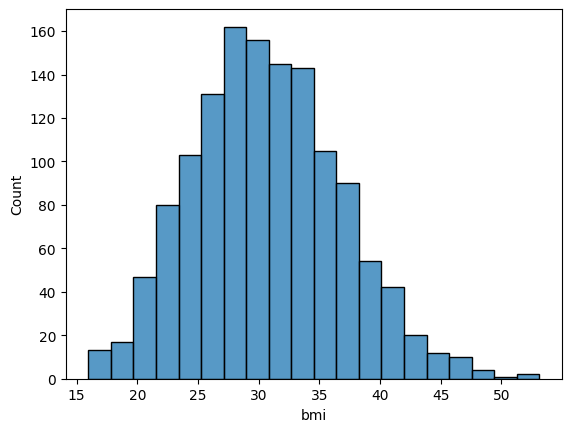

In [83]:
sns.histplot(df['bmi'], bins=20)

<Axes: xlabel='bmi', ylabel='Density'>

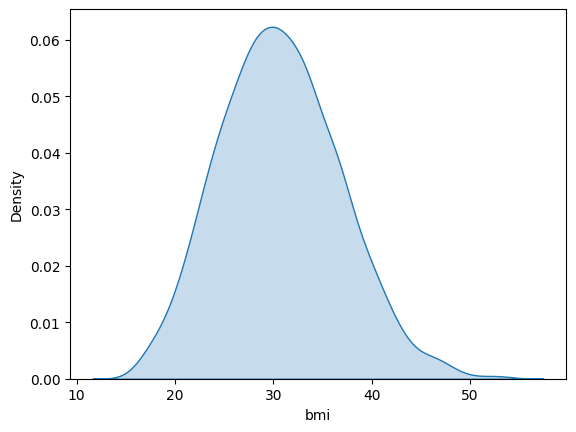

In [84]:
sns.kdeplot(df['bmi'],fill=True)

<Axes: xlabel='charges', ylabel='Count'>

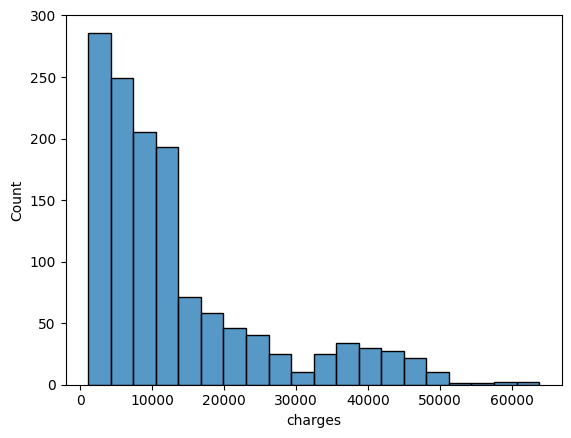

In [85]:
sns.histplot(df['charges'], bins=20)

<Axes: xlabel='charges', ylabel='Density'>

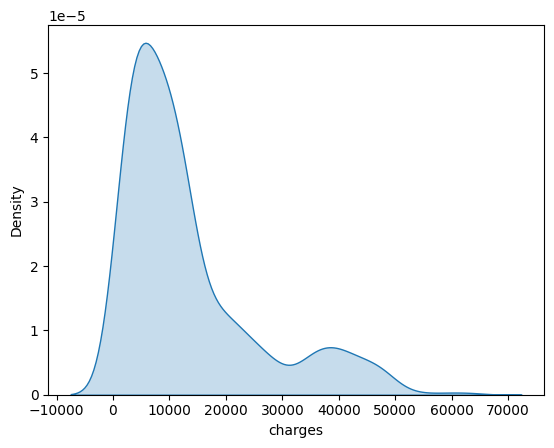

In [86]:
sns.kdeplot(df['charges'],fill=True)

## Understanding Distributions, Skewness & Outliers

When we plot variables, the **shape of their distribution** tells us a lot about the data:

| Variable | Shape we observed | Meaning |
|----------|------------------|----------|
| `charges` | **Right-skewed** (long tail on the right) | Most people pay moderate premiums, but a few pay very high amounts (often smokers / older people). |
| `bmi` | ~Normal (bell-shaped) | BMIs cluster around 25–35; few very low or very high values. |
| `age` | Almost flat / custom | People in the dataset are spread fairly evenly from 18–60+. |

---

### Why do we care about distributions?

1. **Spot unusual values (outliers)**  
   - Are they data entry errors or valid rare cases?
2. **Understand data quality**  
   - Are there missing gaps or unexpected spikes?
3. **Prepare for modelling**  
   - Some algorithms (e.g., Linear Regression, Logistic Regression, K-means) work best when variables aren’t extremely skewed.

> **Distributions are like an X-ray of your data — they reveal the hidden structure and possible “fractures”.**

---

### What to do with outliers & skewed data

| Situation | Typical action |
|-----------|----------------|
| Valid rare cases (e.g., very high `charges`) | Keep them so the model can learn about expensive claims. |
| Obvious errors (e.g., negative BMI) | Fix or drop those rows. |
| Highly skewed data for scale-sensitive models | Apply a transformation (e.g., `log`, `sqrt`) or use a **robust scaler**. |
| Tree-based models (Random Forest, XGBoost) | Usually no need to transform; they handle skew naturally. |

> Rule of thumb: if the value is **real and important**, keep it.  
> If it’s an **error or irrelevant** to the prediction task, handle or remove it.

---




In [87]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Lets see the categorical columns aswell

In [88]:
cat_cols = ['sex','smoker','region','children']
for col in cat_cols:
  print(df[col].value_counts())



sex
male      675
female    662
Name: count, dtype: int64
smoker
no     1063
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64
children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


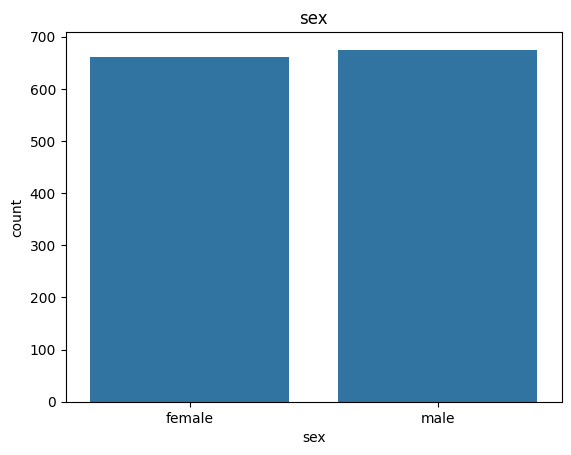

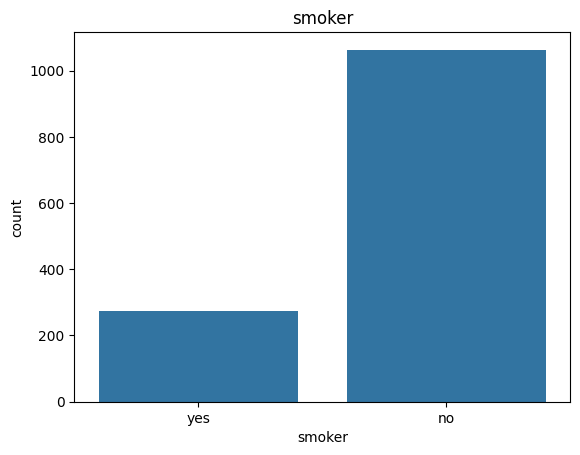

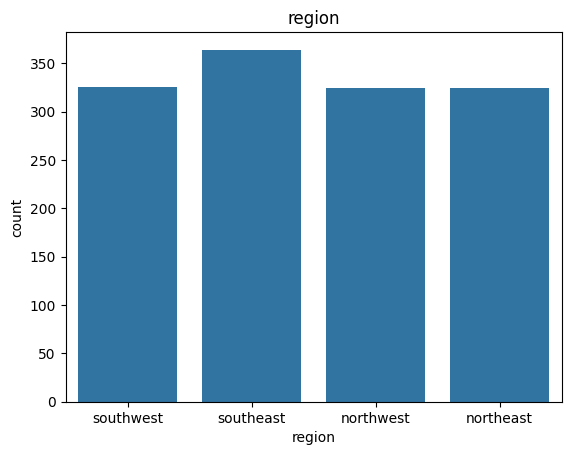

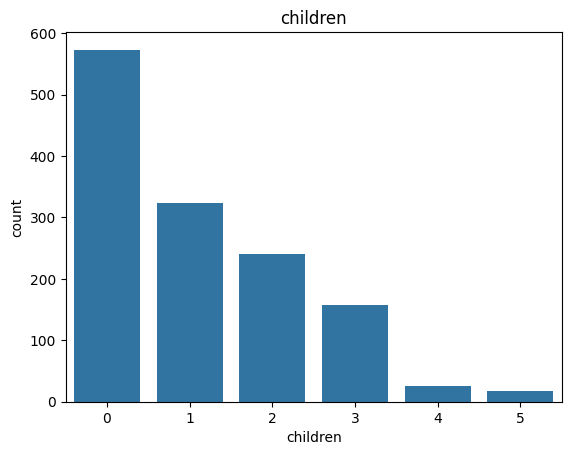

In [89]:
  for col in cat_cols:
    sns.countplot(x=col,data=df)
    plt.title(col)
    plt.show()


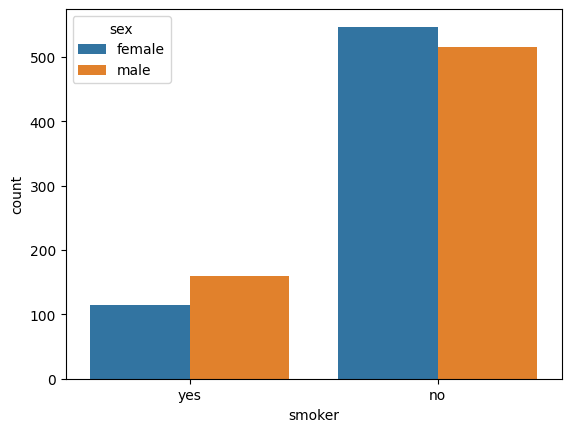

In [90]:
sns.countplot(x = 'smoker',hue = 'sex',data = df)
plt.show()

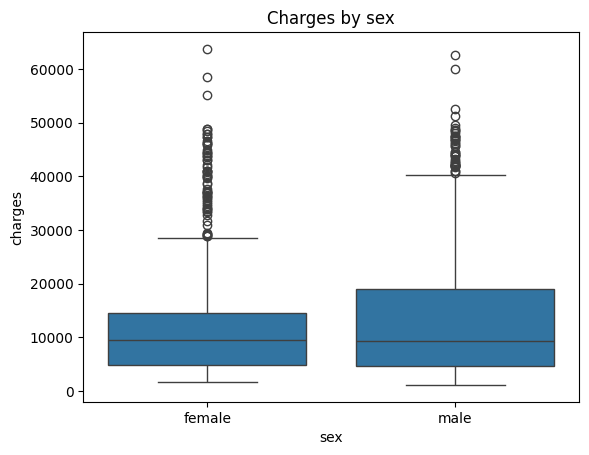

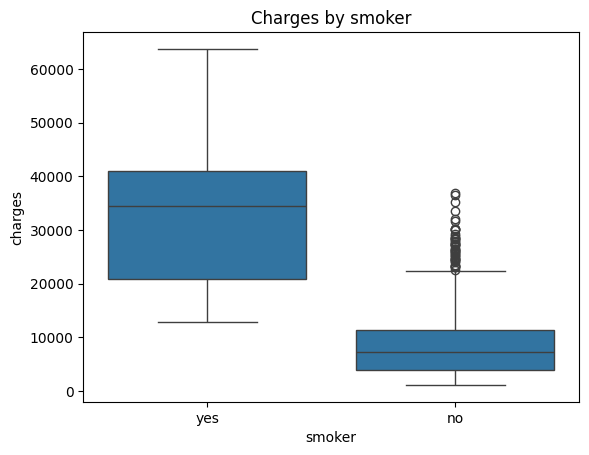

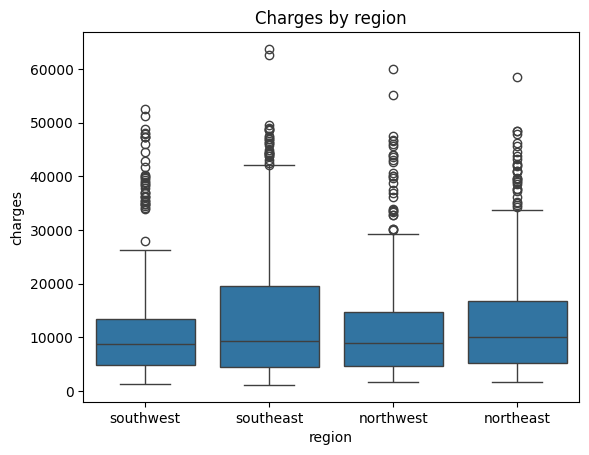

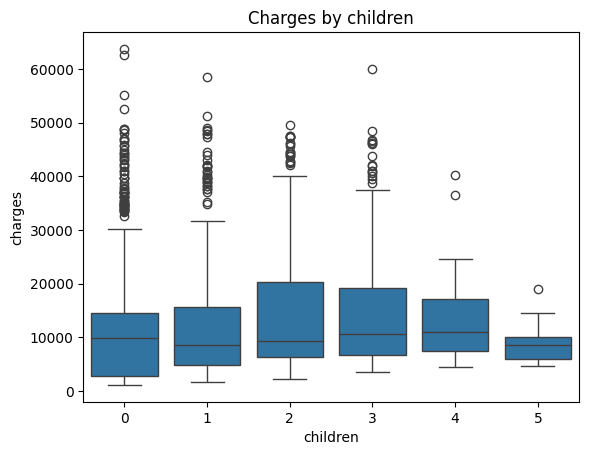

In [91]:
for cols in cat_cols:
  sns.boxplot(x=cols,y='charges',data=df)
  plt.title(f"Charges by {cols}")
  plt.show()

## Insights from Categorical Variables (EDA)

After plotting and summarising the categorical columns (`sex`, `smoker`, `region`), we can interpret them as follows:

---

### 1️⃣ Frequency & Distribution
- **`sex`** – Almost evenly split between `male` and `female`.
- **`smoker`** – A smaller group (~20%) are smokers; majority are non-smokers.
- **`region`** – All four regions are represented; `southeast` has slightly more entries.

👉 These counts show how balanced each category is. Highly imbalanced classes can make a model biased, so it’s good to know the spread.

---

### 2️⃣ Charges by Category (Boxplots)
- **Smokers** have **much higher charges** than non-smokers — this is the biggest driver of insurance cost.
- **Sex** doesn’t show a strong effect on charges; both groups have similar medians.
- **Region** has only mild differences; charges are roughly similar across locations.

👉 Boxplots help us see how the target variable (`charges`) changes with each category.

---

### 3️⃣ Why this matters
- Categorical EDA tells us **which features are likely important** for prediction.
- It also reveals **imbalance** (e.g., few smokers) so we can plan resampling or careful evaluation later.
- If some categories don’t affect the target, we might simplify them or drop them in feature engineering.

> **Summary:**  
> - `smoker` is a strong predictor of `charges`.  
> - `region` and `sex` show only weak effects.  
> - All categories are clean (no missing or weird labels).


# Step 5 - Prepare Data for Machine Learning
Once EDA is done, you use those insights to make the dataset model-ready.
Encode Categorical Variables

Convert non-numeric columns (sex, smoker, region) into numbers so algorithms can understand them.


## Encoding Categorical Variables: One-Hot vs Label Encoding

Most machine-learning algorithms can’t handle text directly — they need numbers.  
To convert categories → numbers, we usually use **Label Encoding** or **One-Hot Encoding**.

---

### 1️⃣ Label Encoding
- **What it does:** Assigns an integer to each category.  
  Example for `region`:
  | region     | encoded |
  |------------|---------|
  | northeast  | 0 |
  | northwest  | 1 |
  | southeast  | 2 |
  | southwest  | 3 |

- **When to use:**
  - If the variable is **ordinal** (has a natural order):  
    e.g., `education_level` = {High School < Bachelor < Master < PhD}
  - Tree-based models (Decision Tree, Random Forest, XGBoost) can also handle label-encoded data because they don’t assume any linear relationship.

- **Risk:** For non-ordinal data, numbers may imply a false order (e.g., “male=0, female=1” could make a regression think 1 > 0).

---

### 2️⃣ One-Hot Encoding
- **What it does:** Creates new binary columns — one for each category.  
  Example for `region`:
  | northeast | northwest | southeast | southwest |
  |-----------|-----------|-----------|-----------|
  | 1 | 0 | 0 | 0 |
  | 0 | 1 | 0 | 0 |
  | 0 | 0 | 1 | 0 |

- **When to use:**
  - For **nominal** (unordered) variables, like `region`, `color`, `smoker`.
  - For linear models or distance-based algorithms (KNN, SVM, Logistic/Linear Regression).

- **Tip:** Use `drop_first=True` in `pd.get_dummies()` to avoid the *dummy variable trap* (perfect multicollinearity).

---

### ✅ Rule of Thumb

| Variable type | Preferred encoding |
|---------------|-------------------|
| Ordinal (ordered) | **Label Encoding** |
| Nominal (unordered) | **One-Hot Encoding** |

> If unsure, use **One-Hot** — it’s safe (just increases the number of columns).

---


In [94]:
df_encoded = pd.get_dummies(df, columns = ['sex', 'smoker', 'region'] ,drop_first=True)
df_encoded = df_encoded.astype(int)
df_encoded

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30,3,10600,1,0,1,0,0
1334,18,31,0,2205,0,0,0,0,0
1335,18,36,0,1629,0,0,0,1,0
1336,21,25,0,2007,0,0,0,0,1


### Scale / Normalize Numerical Features

Some algorithms (Linear/Logistic Regression, KNN, SVM, Neural Nets) are sensitive to feature scales.
👉 Apply StandardScaler or MinMaxScaler to columns like age, bmi, children, charges.

In [95]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [96]:
scaler = StandardScaler()
cols = ['age','bmi','children']
df_encoded[cols] = scaler.fit_transform(df_encoded[cols])

In [97]:
df_encoded

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.440418,-0.517949,-0.909234,16884,0,1,0,0,1
1,-1.511647,0.462463,-0.079442,1725,1,0,0,1,0
2,-0.799350,0.462463,1.580143,4449,1,0,0,1,0
3,-0.443201,-1.334960,-0.909234,21984,1,0,1,0,0
4,-0.514431,-0.354547,-0.909234,3866,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,0.767704,-0.027743,1.580143,10600,1,0,1,0,0
1334,-1.511647,0.135659,-0.909234,2205,0,0,0,0,0
1335,-1.511647,0.952670,-0.909234,1629,0,0,0,1,0
1336,-1.297958,-0.844753,-0.909234,2007,0,0,0,0,1


# Data Division


In [98]:
x = df_encoded.drop('charges',axis=1)
y = df_encoded['charges']

## Log transformation

## Log Transformation: Why & When to Use It

When we plotted the `charges` column, we saw a **long right tail** (right-skewed).  
A **log transformation** can help in such cases.

---

### 🔍 What is a Log Transformation?
A log transform applies the logarithm to each value:

\[
x_\text{new} = \log(x) \quad \text{or} \quad x_\text{new} = \log(x+1)
\]

> We often use `log1p()` (log of x+1) to safely handle zero values.

---

### 💡 Why do we use it?
- **Reduce skewness** → Compresses very large values so the data becomes closer to a bell curve.  
- **Stabilize variance** → Big numbers don’t dominate the scale.  
- **Make relationships more linear** → Helpful for regression-type models.

> Example: `charges` has many small/medium values and a few extremely high ones.  
> Taking the log evens out the spread.

---

### 🚫 When *not* to use it
- For tree-based models (Random Forest, XGBoost, Gradient Boosting) — they don’t need transformed targets or predictors.
- If you want to directly predict large values (e.g., high medical bills) without converting them back.

---
